In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [2]:
conn = psycopg2.connect(
    host="localhost",
    database="capstone",
    user="postgres",
    password="postgres")

In [6]:
sql="""SELECT followers_count,favourites_count,friends_count from users"""

In [7]:
df=pd.read_sql(sql,conn)

In [8]:
df.head()

,followers_count,favourites_count,friends_count
0,5870,115,550
1,170717,24,91751
2,6067,90,369
3,25747,440,598
4,13048,12,313


<IPython.core.display.Javascript object>


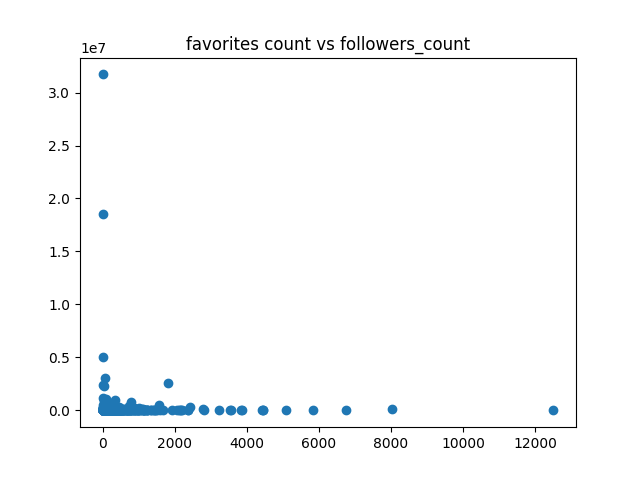

In [19]:
plt.scatter(df.followers_count,df.favourites_count)
plt.title('favorites count vs followers_count')
plt.show()

In [23]:
coeff1=np.corrcoef(df.favourites_count,df.followers_count)
coeff1

array([[ 1.        , -0.02480359],
       [-0.02480359,  1.        ]])

In [18]:
plt.scatter(df.friends_count,df.favourites_count)
plt.title('favorites count vs friends_count')
plt.show()

In [24]:
sql2="""SELECT retweet_count, polarity from tweets2"""

In [25]:
df2=pd.read_sql(sql2,conn)

In [26]:
df2.head()

,retweet_count,polarity
0,0.0,0.468182
1,0.0,-0.025000
2,1.0,0.000000
3,0.0,0.000000
4,0.0,0.700000


<IPython.core.display.Javascript object>


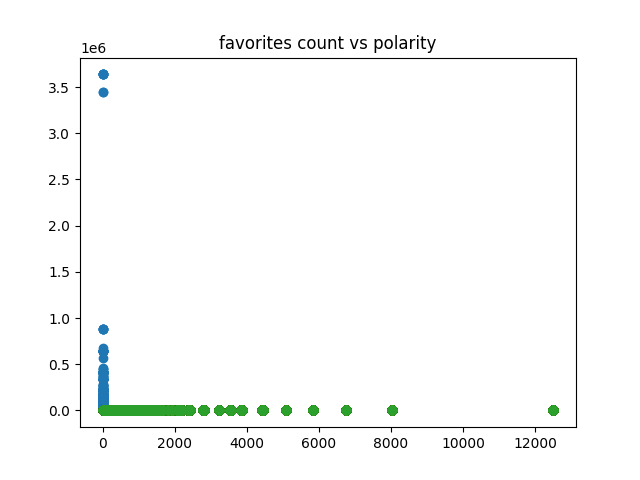

In [28]:
plt.scatter(df2.polarity, df2.retweet_count)
plt.title('retweet count vs polarity')
plt.show()

In [29]:
sql3="""select polarity, favourites_count from tweets2 left join users on tweets2.user_id = users.id"""
df3=pd.read_sql(sql3,conn)

In [30]:
df3.head()

,polarity,favourites_count
0,0.468182,25.0
1,-0.025000,266.0
2,0.000000,266.0
3,0.000000,280.0
4,0.700000,280.0


<IPython.core.display.Javascript object>


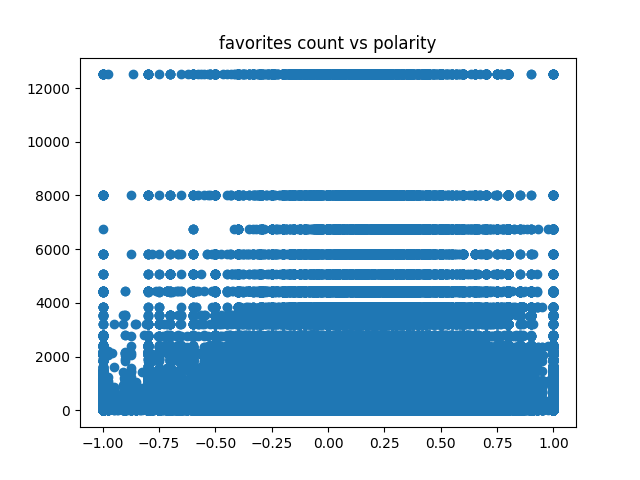

In [35]:
plt.scatter(df3.polarity,df3.favourites_count)
plt.title('favorites count vs polarity')
plt.show()

In [3]:
sql5="""select favorite_count, retweet_count from tweets2"""
df5=pd.read_sql(sql5,conn)
df5.head()

,favorite_count,retweet_count
0,0,109.0
1,2,1.0
2,0,0.0
3,5,2.0
4,0,1988.0


In [4]:
df5.dropna(inplace=True)

In [6]:
df5.favorite_count=df5.favorite_count.apply(lambda x: int(x))

In [ ]:
coeff1=np.corrcoef(df5.polarity,df5.favorite_count)
coeff1

<IPython.core.display.Javascript object>


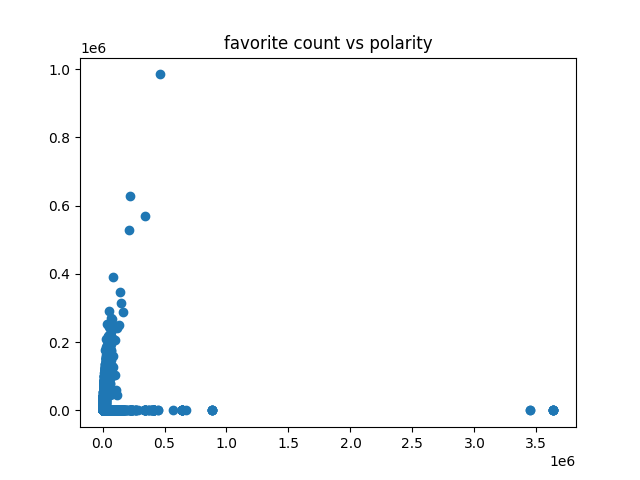

In [8]:
plt.scatter(df5.retweet_count,df5.favorite_count)
plt.title('favorite count vs polarity')
plt.show()

In [4]:
sql7="""select avg(retweet_count) as rtwt,user_id, avg(polarity) as pol from tweets2 group by user_id"""
df7=pd.read_sql(sql7,conn)
df7.head()

,rtwt,user_id,pol
0,5.888252,5558312.0,0.183887
1,28.223529,7270292.0,0.129663
2,63.966292,7429102.0,0.182500
3,24.961717,10615232.0,0.114025
4,57.364677,11651202.0,0.165174


<IPython.core.display.Javascript object>


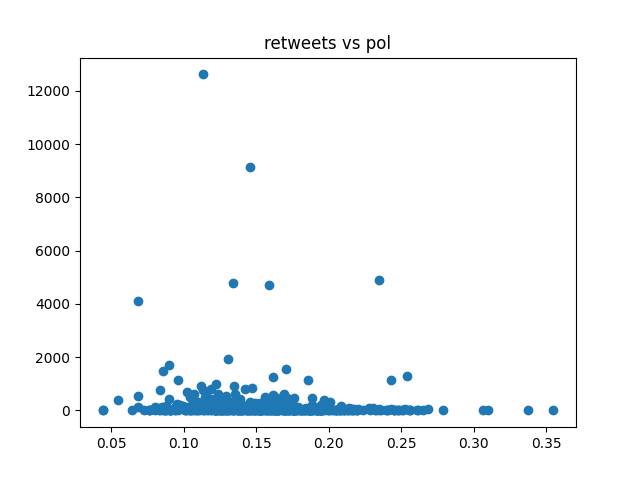

In [5]:
plt.scatter(df7.pol,df7.rtwt)
plt.title('retweets vs pol')
plt.show()

In [6]:
# ok have one, mild non linear corrleation

In [ ]:
#just look at corr coeff for user table counts vs retweets and mention which are higher

In [9]:
sql8="""select retweet_count, favorite_count from tweets2 where favorite_count ~ '^[0-9]*$'"""
df8=pd.read_sql(sql8,conn)
df8.head()

,retweet_count,favorite_count
0,23.0,186
1,2.0,7
2,15.0,71
3,8.0,0
4,22.0,0


In [10]:
df8.dtypes

retweet_count     float64
favorite_count     object
dtype: object

In [11]:
df8.favorite_count=df8.favorite_count.astype(int)

<IPython.core.display.Javascript object>


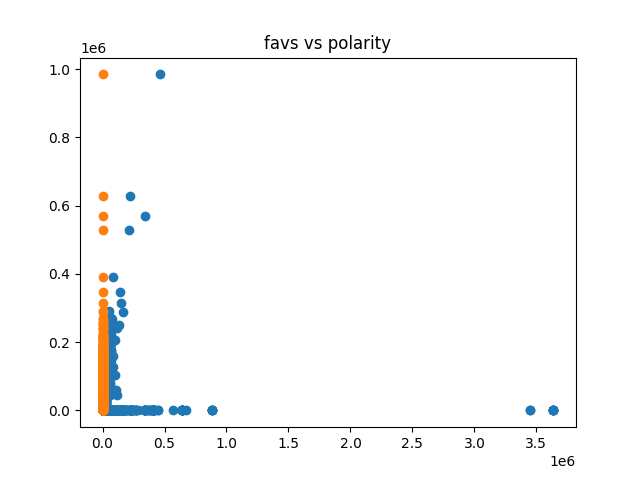

In [13]:
plt.scatter(df8.retweet_count,df8.favorite_count)
plt.title('retweets vs favs')
plt.show()

In [14]:
coeff1=np.corrcoef(df8.retweet_count,df8.favorite_count)
coeff1

array([[1.        , 0.10814307],
       [0.10814307, 1.        ]])

In [15]:
sql9="""select polarity, favorite_count from tweets2 where favorite_count ~ '^[0-9]*$'"""
df9=pd.read_sql(sql9,conn)
df9.head()

,polarity,favorite_count
0,0.3500,186
1,0.4750,7
2,0.2675,71
3,0.0000,0
4,0.0000,0


In [17]:
df9.favorite_count=df9.favorite_count.astype(int)

<IPython.core.display.Javascript object>


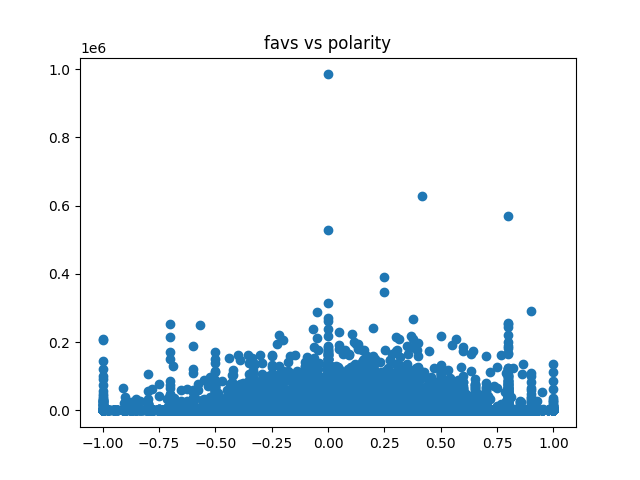

In [19]:
plt.scatter(df9.polarity,df9.favorite_count)
plt.title('favs vs polarity')
plt.show()

In [3]:
sql10="""select count(id), avg(retweet_count) from tweets2 where text like '%trump%' group by user_id"""
df10=pd.read_sql(sql10,conn)
df10.head()

,count,avg
0,1,37.0
1,1,311.0
2,5,31.0
3,1,7.0
4,2,42.0


<IPython.core.display.Javascript object>


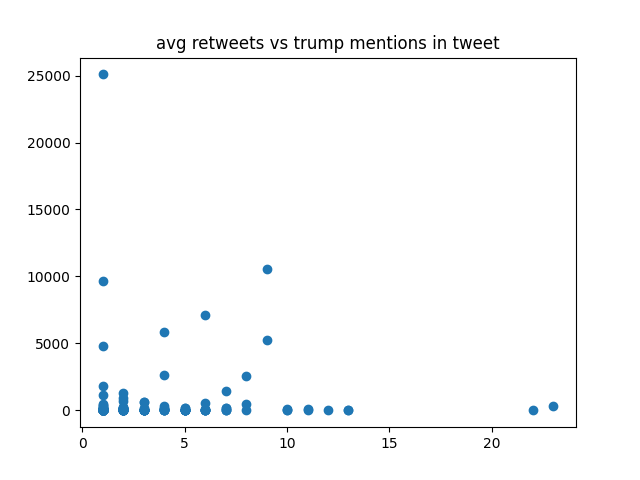

In [5]:
plt.scatter(df10['count'],df10['avg'])
plt.title('avg retweets vs trump mentions in tweet')
plt.show()

In [9]:
coeff3=np.corrcoef(df10['count'],df10['avg'])
coeff3

array([[1.        , 0.05809235],
       [0.05809235, 1.        ]])